In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

In [2]:
# read in csv
df = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
pd.options.display.max_columns = 999
df = df.reindex(sorted(df.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df.drop([960, 1885], inplace=True)

In [3]:
#df.isnull().sum().sort_values()

In [4]:
#replaced 14 of 26 features with NaN to NA as in data dictionary

df = df.fillna({'Pool QC': 'NA',
           'Misc Feature': 'NA',
           'Alley': 'NA',
           'Fence': 'NA',
           'Fireplace Qu': 'NA',
           'Garage Finish': 'NA',
           'Garage Qual': 'NA',
           'Garage Cond': 'NA',
           'Garage Type': 'NA',
           'Bsmt Exposure': 'NA',
           'BsmtFin Type 2': 'NA',
           'BsmtFin Type 1': 'NA',
           'Bsmt Cond': 'NA',
           'Bsmt Qual': 'NA',
           'Mas Vnr Type': 'NA',
           'Electrical': 'NA',
})
df_test = df_test.fillna({'Pool QC': 'NA',
           'Misc Feature': 'NA',
           'Alley': 'NA',
           'Fence': 'NA',
           'Fireplace Qu': 'NA',
           'Garage Finish': 'NA',
           'Garage Qual': 'NA',
           'Garage Cond': 'NA',
           'Garage Type': 'NA',
           'Bsmt Exposure': 'NA',
           'BsmtFin Type 2': 'NA',
           'BsmtFin Type 1': 'NA',
           'Bsmt Cond': 'NA',
           'Bsmt Qual': 'NA',
           'Mas Vnr Type': 'NA',
           'Electrical': 'NA',
})

In [5]:
#df.isnull().sum().sort_values()

In [6]:
feat_list = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Bsmt Unf SF', 'BsmtFin SF 2']
for feat in feat_list:
        df[feat].fillna(df[feat].mean(), inplace=True)

test_feat_list = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Bsmt Unf SF', 'BsmtFin SF 2']
for feat in test_feat_list:
        df_test[feat].fillna(df_test[feat].mean(), inplace=True)

In [7]:
#df_test.isnull().sum().sum()

In [8]:
#select only columns that are num, i.e. not 'object', set equal to variable, but why .index?
num_columns = df.dtypes[df.dtypes != 'object'].index
# select all null, set equal to variable
is_nulls = df.isnull().sum()
# selsct all not null, set equal to variable
not_null_columns = is_nulls[is_nulls==0].index
selected = df[not_null_columns & num_columns]
selected

/var/folders/nf/hqtqkkg54s75vy60jfg0jcp00000gn/T/ipykernel_67199/3370270089.py:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  selected = df[not_null_columns & num_columns]


,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Enclosed Porch,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Yr Blt,Gr Liv Area,Half Bath,Id,Kitchen AbvGr,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,3,0.0,0.0,192.0,533.0,0.0,0,0,2,475.0,2.0,1976.0,1479,1,109,1,13517,68.878999,0,60,289.0,0,3,44,8,6,533352170,0,130500,0,6,725.0,0,1976,2005,2010
1,913,1209,0,4,1.0,0.0,276.0,637.0,0.0,0,1,2,559.0,2.0,1997.0,2122,1,544,1,11492,43.000000,0,60,132.0,0,4,74,5,7,531379050,0,220000,0,8,913.0,0,1996,1997,2009
2,1057,0,0,3,1.0,0.0,326.0,731.0,0.0,0,0,1,246.0,1.0,1953.0,1057,0,153,1,7922,68.000000,0,20,0.0,0,1,52,7,5,535304180,0,109000,0,5,1057.0,0,1953,2007,2010
3,744,700,0,3,0.0,0.0,384.0,0.0,0.0,0,0,2,400.0,2.0,2007.0,1444,1,318,1,9802,73.000000,0,60,0.0,0,4,0,5,5,916386060,0,174000,0,7,384.0,100,2006,2007,2010
4,831,614,0,3,0.0,0.0,676.0,0.0,0.0,0,0,2,484.0,2.0,1957.0,1445,0,255,1,14235,82.000000,0,50,0.0,0,3,59,8,6,906425045,0,138500,0,6,676.0,0,1900,1993,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1728,0,0,3,1.0,0.0,873.0,1011.0,0.0,0,1,2,520.0,2.0,2007.0,1728,0,1587,1,11449,79.000000,0,20,0.0,0,1,276,5,8,921126030,0,298751,0,7,1884.0,0,2007,2007,2008
2047,861,0,0,1,0.0,0.0,599.0,262.0,0.0,0,0,1,539.0,2.0,1961.0,861,0,785,1,12342,68.878999,0,30,0.0,0,3,0,5,4,905377130,0,82500,0,4,861.0,158,1940,1950,2009
2048,1172,741,0,3,0.0,0.0,896.0,0.0,0.0,0,1,1,342.0,2.0,1929.0,1913,1,916,1,7558,57.000000,0,50,0.0,0,3,0,6,6,909253010,0,177000,0,9,896.0,0,1928,1950,2009
2049,1200,0,0,3,1.0,0.0,295.0,155.0,750.0,140,2,1,294.0,1.0,1956.0,1200,0,639,1,10400,80.000000,0,20,0.0,0,11,189,5,4,535179160,0,144000,0,6,1200.0,0,1956,1956,2009


In [9]:
#set X, y
#selected is dataframe, remove 'SalePrice'
X = selected.drop(columns='SalePrice')
#?X = X.transpose()
features = X.columns
y = df['SalePrice']
#instantiate
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33)
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [10]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train_log);

In [11]:
cross_val_score(lr, Z_train, y_train_log).mean()

0.8936459401239913

In [12]:
lr.fit(Z_train, y_train_log)

lr.score(Z_train, y_train_log)

0.8977141875570842

In [13]:
lr.score(Z_test, y_test_log)

0.8906662948887317

In [14]:
lasso_cv.score(Z_train, y_train_log), lasso_cv.score(Z_test, y_test_log)

(0.898686495254365, 0.8932243382254023)

In [15]:
cross_val_score(lasso_cv, Z_train, y_train_log).mean()

0.8942870344872412

In [16]:
pred = lasso_cv.predict(Z_test)

residuals = y_test_log - pred

 ASSESS:
 - train score = 89.9
 - test score = 89.2
 - cross_val score = 89.3
 looks like low variance, low on bias 

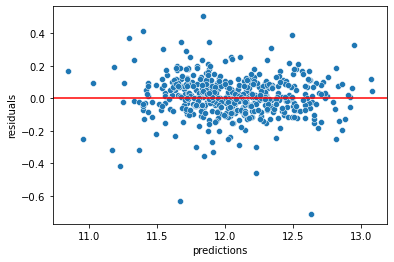

In [17]:
plt.axhline(y=0, color='r')
sns.scatterplot(x=pred, y=residuals)
('Residual Plot to Show error - Epsilon')
plt.xlabel('predictions')
plt.ylabel('residuals');

0.010037498938398448

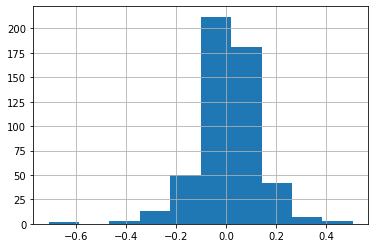

In [18]:
residuals.hist();
residuals.mean()

In [19]:
#make preds on test
pred_test = lasso_cv.predict(df_test[features])

df_test['SalePrice'] = np.exp(pred_test)

#test_preds = lr.predict(df_test[features])
#test_preds.shape

#create target column 'SalePrice' in df_test
#df_test['SalePrice'] = test_preds

#create df for submission with only Id and SalePrice
submission = df_test[['Id', 'SalePrice']]

submission.set_index('Id', inplace=True)
submission.head()

,SalePrice
Id,
2658,0.0
2718,0.0
2414,0.0
1989,0.0
625,0.0


In [20]:
#submission.to_csv('./datasets/Kaggle Submissions/log and lasso2.csv')

Didn't run errors, but didn't populate correctly for a Kaggle submission. Abandoned